In [1]:
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# single stick sticking down

In [2]:
def run2taskL(taskL,nitr=50):
  ntasks = len(taskL)
  rt = np.zeros([nitr,4,ntasks])
  smode = np.zeros([nitr,4,ntasks])
  for itr in range(nitr):
    for idx,(mem,bfs) in enumerate(itertools.product([False,True],[True,False])):
      D = treeSearch(taskL,BFS=bfs,memory=mem)
      rt[itr,idx],smode[itr,idx] = D['rt'],D['smode']
  return rt,smode
idxL = ['BFS','DFS','BFSm','DFSm']

In [3]:
def line_plt_rt(ax,rt):
  for mi in range(len(idxL)):
    M = rt.mean(0)[mi]
    S = rt.std(0)[mi]/np.sqrt(len(rt))
    ax.plot(M,label=idxL[mi])
    ax.fill_between(range(len(M)),M-S,M+S,alpha=0.4)
  ax.legend()

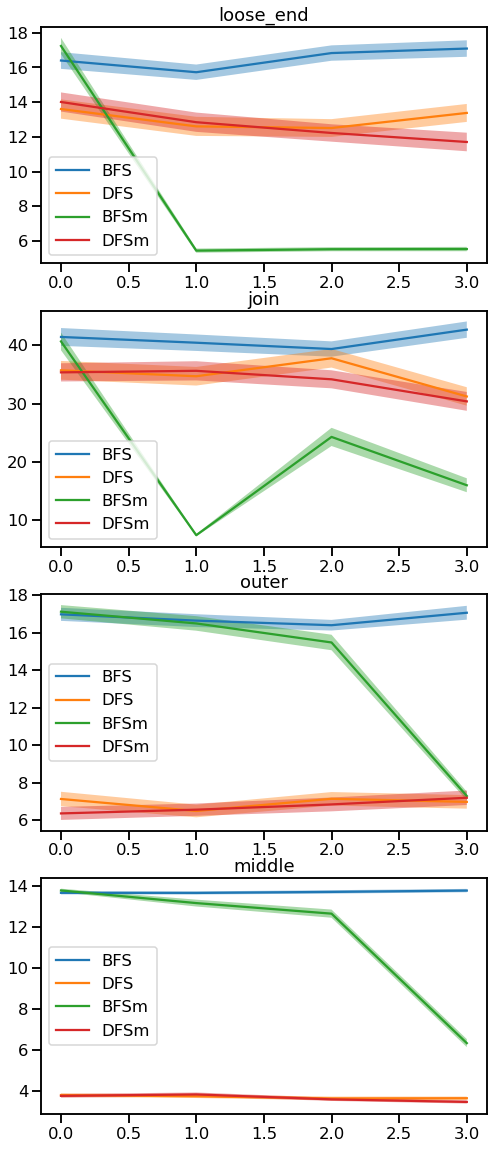

In [14]:
from board_gen import *
nitr = 200
f,axar = plt.subplots(4,1,figsize=(8,20))
stratL = ['loose_end','join','outer','middle']
for si in range(4):
  ax = axar[si]
  ax.set_title(stratL[si])
  taskL = []
#   taskL += [generate_board(tactic_name=stratL[si],n_extra_sticks=0,contiguous=True) for i in range(4)]
  taskL += [generate_board(tactic_name=stratL[si],n_extra_sticks=1,contiguous=True) for i in range(4)]
#   taskL += [generate_board(tactic_name=stratL[si],n_extra_sticks=2,contiguous=True) for i in range(4)]
  rt,smode_g = run2taskL(taskL,nitr)
  line_plt_rt(ax,rt)
  

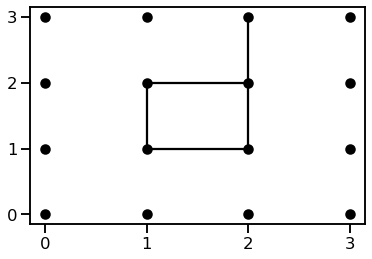

In [11]:
from utils import *
draw_board(LOOSE_END_BOARD)

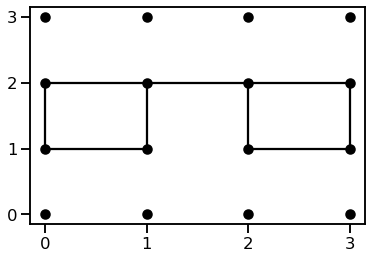

In [12]:
draw_board(JOIN_BOARD)